<a href="https://colab.research.google.com/github/sagar0308/HR-Analytics/blob/main/HR_Analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)


from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, MinMaxScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score,classification_report,f1_score,confusion_matrix,precision_score,roc_auc_score
from sklearn.metrics import precision_recall_fscore_support as error_metric
from sklearn.feature_selection import SelectFromModel

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [3]:
data = pd.read_csv('/content/gdrive/MyDrive/ML_Projects/HR_Data_Train.csv')
df = pd.read_csv('/content/gdrive/MyDrive/ML_Projects/HR_Data_Test.csv')

In [4]:
data.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,23798,city_149,0.689,Male,Has relevent experience,no_enrollment,Graduate,STEM,3,100-500,Pvt Ltd,1,106,0
1,29166,city_83,0.923,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,<10,Funded Startup,1,69,0
2,46,city_16,0.910,NaN,Has relevent experience,no_enrollment,Graduate,STEM,6,50-99,Public Sector,2,4,0
3,18527,city_64,0.666,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,50-99,Pvt Ltd,1,26,0
4,21751,city_100,0.887,NaN,No relevent experience,no_enrollment,Masters,STEM,8,NaN,NaN,2,88,1


In [5]:
data.shape

(18359, 14)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18359 entries, 0 to 18358
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             18359 non-null  int64  
 1   city                    18359 non-null  object 
 2   city_development_index  18359 non-null  float64
 3   gender                  14261 non-null  object 
 4   relevent_experience     18359 non-null  object 
 5   enrolled_university     18017 non-null  object 
 6   education_level         17902 non-null  object 
 7   major_discipline        15521 non-null  object 
 8   experience              18300 non-null  object 
 9   company_size            13580 non-null  object 
 10  company_type            13320 non-null  object 
 11  last_new_job            17992 non-null  object 
 12  training_hours          18359 non-null  int64  
 13  target                  18359 non-null  int64  
dtypes: float64(1), int64(3), object(10)
me

In [7]:
data.describe()

,enrollee_id,city_development_index,training_hours,target
count,18359.000000,18359.000000,18359.000000,18359.000000
mean,16729.360096,0.847140,65.899014,0.132088
std,9643.749725,0.110189,60.885300,0.338595
min,1.000000,0.448000,1.000000,0.000000
25%,8378.500000,0.796000,23.000000,0.000000
50%,16706.000000,0.910000,47.000000,0.000000
75%,25148.500000,0.920000,89.000000,0.000000
max,33380.000000,0.949000,336.000000,1.000000


In [8]:
data.isnull().sum()

enrollee_id                  0
city                         0
city_development_index       0
gender                    4098
relevent_experience          0
enrolled_university        342
education_level            457
major_discipline          2838
experience                  59
company_size              4779
company_type              5039
last_new_job               367
training_hours               0
target                       0
dtype: int64

In [9]:
data.isnull().sum()*100/data.shape[0]

enrollee_id                0.000000
city                       0.000000
city_development_index     0.000000
gender                    22.321477
relevent_experience        0.000000
enrolled_university        1.862847
education_level            2.489242
major_discipline          15.458358
experience                 0.321368
company_size              26.030830
company_type              27.447029
last_new_job               1.999020
training_hours             0.000000
target                     0.000000
dtype: float64

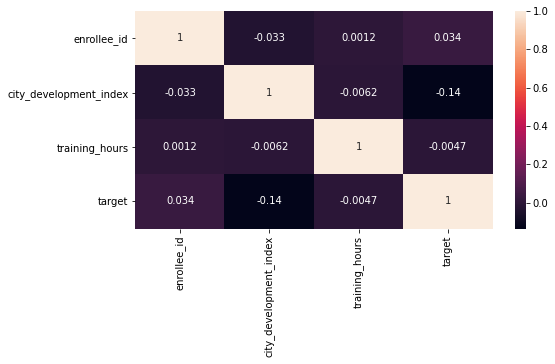

In [11]:
fig,ax = plt.subplots(figsize = (8,4))
sns.heatmap(data.corr(),annot = True,annot_kws={'size':10})

##Let's deal with the NULL values!

In [12]:
data.gender.value_counts()

Male      12884
Female     1188
Other       189
Name: gender, dtype: int64

In [13]:
data.groupby('gender')['target'].value_counts()

gender  target
Female  0          1009
        1           179
Male    0         11306
        1          1578
Other   0           160
        1            29
Name: target, dtype: int64

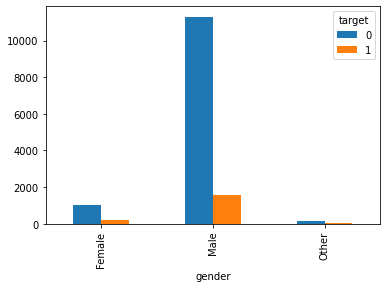

In [14]:
data.groupby('gender')['target'].value_counts().unstack().plot(kind='bar')

In [15]:
data.gender=data.gender.fillna('Male')

In [16]:
data.target.value_counts()*100/data.shape[0]

0    86.79122
1    13.20878
Name: target, dtype: float64

In [17]:
data.city.value_counts()*100/data.shape[0]

city_103    23.737676
city_21      9.107250
city_16      9.009205
city_114     8.017866
city_160     4.504603
city_136     3.398878
city_67      2.478348
city_75      1.808377
city_104     1.732120
city_102     1.704886
city_71      1.530584
city_100     1.476115
city_73      1.437987
city_61      1.181982
city_28      1.154747
city_23      1.056702
city_65      1.024021
city_90      0.980446
city_36      0.953211
city_173     0.849719
city_50      0.817038
city_11      0.817038
city_83      0.773463
city_116     0.713546
city_46      0.697206
city_138     0.686312
city_162     0.680865
city_45      0.648183
city_64      0.648183
city_97      0.593714
city_57      0.588267
city_149     0.571927
city_99      0.550139
city_159     0.539245
city_19      0.533798
city_10      0.517457
city_41      0.517457
city_165     0.490223
city_105     0.473882
city_98      0.468435
city_123     0.424860
city_40      0.397625
city_89      0.375837
city_74      0.359497
city_150     0.359497
city_128  

In [18]:
len(data.city.value_counts())

123

In [19]:
data.isnull().sum()

enrollee_id                  0
city                         0
city_development_index       0
gender                       0
relevent_experience          0
enrolled_university        342
education_level            457
major_discipline          2838
experience                  59
company_size              4779
company_type              5039
last_new_job               367
training_hours               0
target                       0
dtype: int64

In [20]:
data.enrolled_university.value_counts()

no_enrollment       13659
Full time course     3187
Part time course     1171
Name: enrolled_university, dtype: int64

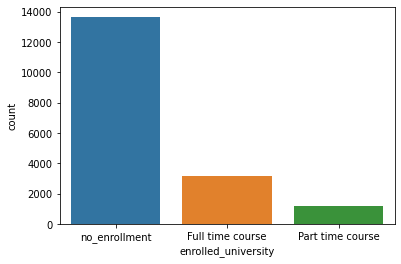

In [21]:
sns.countplot(x = 'enrolled_university', data = data)

In [22]:
data.groupby(['enrolled_university','relevent_experience'])['target'].value_counts()

enrolled_university  relevent_experience      target
Full time course     Has relevent experience  0          1074
                                              1           227
                     No relevent experience   0          1506
                                              1           380
Part time course     Has relevent experience  0           721
                                              1           106
                     No relevent experience   0           276
                                              1            68
no_enrollment        Has relevent experience  0         10067
                                              1          1231
                     No relevent experience   0          2004
                                              1           357
Name: target, dtype: int64

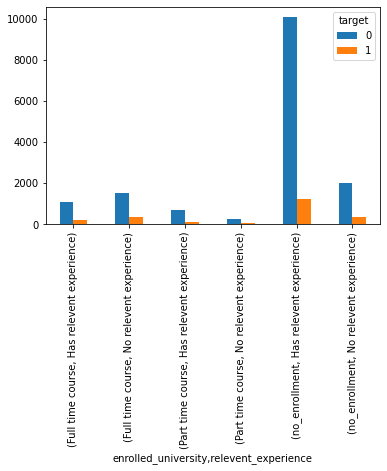

In [23]:
data.groupby(['enrolled_university','relevent_experience'])['target'].value_counts().unstack().plot(kind='bar')

In [24]:
test =data[data.target==1]['city'].value_counts()*100/(data[data.target==1]['city'].value_counts()+data[data.target==0]['city'].value_counts())

In [25]:
pd.Series.sort_values(test)

city_77      2.631579
city_30      4.347826
city_157     4.761905
city_97      5.504587
city_138     5.555556
city_173     6.410256
city_104     6.603774
city_20      6.666667
city_36      6.857143
city_1       7.407407
city_28      7.547170
city_45      7.563025
city_127     7.692308
city_23      7.731959
city_136     7.852564
city_105     8.045977
city_98      8.139535
city_40      8.219178
city_61      8.294931
city_24      8.333333
city_7       8.333333
city_50      8.666667
city_72      9.090909
city_116     9.160305
city_114     9.239130
city_16      9.310762
city_13      9.433962
city_10      9.473684
city_75      9.638554
city_83      9.859155
city_167    10.000000
city_69     10.000000
city_64     10.084034
city_159    10.101010
city_57     10.185185
city_65     10.638298
city_67     10.769231
city_99     10.891089
city_71     11.032028
city_141    11.111111
city_102    11.501597
city_160    11.850060
city_93     12.000000
city_14     12.000000
city_26     12.000000
city_149  

In [26]:
data.enrolled_university=data.enrolled_university.fillna("no_enrollment")

In [27]:
data.education_level.value_counts()

Graduate          10769
Masters            4319
High School        2032
Phd                 459
Primary School      323
Name: education_level, dtype: int64

In [28]:
data.groupby('education_level')['target'].value_counts()

education_level  target
Graduate         0         9237
                 1         1532
High School      0         1791
                 1          241
Masters          0         3806
                 1          513
Phd              0          406
                 1           53
Primary School   0          298
                 1           25
Name: target, dtype: int64

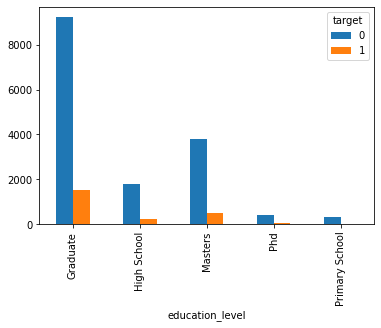

In [29]:
data.groupby('education_level')['target'].value_counts().unstack().plot(kind='bar')

In [30]:
data.education_level=data.education_level.fillna("Graduate")

In [31]:
data.education_level.value_counts()

Graduate          11226
Masters            4319
High School        2032
Phd                 459
Primary School      323
Name: education_level, dtype: int64

In [32]:
data.major_discipline.value_counts()

STEM               13738
Humanities           688
Other                343
Business Degree      307
Arts                 239
No Major             206
Name: major_discipline, dtype: int64

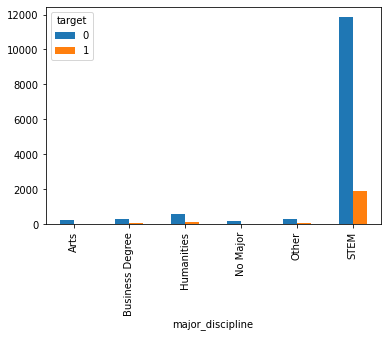

In [33]:
data.groupby('major_discipline')['target'].value_counts().unstack().plot(kind='bar')

In [34]:
data.groupby(['education_level'])['target'].value_counts()

education_level  target
Graduate         0         9633
                 1         1593
High School      0         1791
                 1          241
Masters          0         3806
                 1          513
Phd              0          406
                 1           53
Primary School   0          298
                 1           25
Name: target, dtype: int64

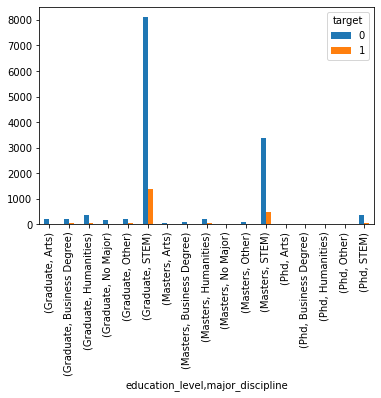

In [35]:
data.groupby(['education_level', 'major_discipline'])['target'].value_counts().unstack().plot(kind='bar')

In [36]:
data.education_level.value_counts()

Graduate          11226
Masters            4319
High School        2032
Phd                 459
Primary School      323
Name: education_level, dtype: int64

In [37]:
data[data.education_level=='High School']['major_discipline'].replace(np.NaN,'Other',inplace=True)
data[data.education_level=='Primary School']['major_discipline'].replace(np.NaN,'Other',inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4582: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


In [38]:
data.major_discipline.isnull().sum()

2838

In [39]:
data.major_discipline.value_counts()

STEM               13738
Humanities           688
Other                343
Business Degree      307
Arts                 239
No Major             206
Name: major_discipline, dtype: int64

In [40]:
data.major_discipline=data.major_discipline.fillna("STEM")

In [41]:
data[data.education_level=='High School']['major_discipline']

15       STEM
22       STEM
24       STEM
25       STEM
41       STEM
         ... 
18252    STEM
18275    STEM
18280    STEM
18319    STEM
18343    STEM
Name: major_discipline, Length: 2032, dtype: object

In [42]:
data.major_discipline.value_counts()

STEM               16576
Humanities           688
Other                343
Business Degree      307
Arts                 239
No Major             206
Name: major_discipline, dtype: int64

In [43]:
data.experience.value_counts()

>20    3437
5      1309
4      1250
3      1159
6      1125
2       992
9       979
10      967
7       950
8       755
15      695
11      667
14      602
16      549
12      497
1       452
<1      416
13      412
17      347
19      308
18      286
20      146
Name: experience, dtype: int64

In [44]:
data[data.relevent_experience=="No relevent experience"]['experience']=data[data.relevent_experience=="No relevent experience"]['experience'].replace(np.NaN,'0')
data[data.relevent_experience=="Has relevent experience"]['experience']=data[data.relevent_experience=="Has relevent experience"]['experience'].replace(np.NaN,'1')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [45]:
data.experience= data.experience.replace(np.NaN,0)

In [46]:
data.experience.value_counts()

>20    3437
5      1309
4      1250
3      1159
6      1125
2       992
9       979
10      967
7       950
8       755
15      695
11      667
14      602
16      549
12      497
1       452
<1      416
13      412
17      347
19      308
18      286
20      146
0        59
Name: experience, dtype: int64

In [47]:
data.experience.replace('>20',21,inplace=True)
data.experience.replace('<1',0,inplace=True)
data.experience=data.experience.astype(int)
data.experience.value_counts()

21    3437
5     1309
4     1250
3     1159
6     1125
2      992
9      979
10     967
7      950
8      755
15     695
11     667
14     602
16     549
12     497
0      475
1      452
13     412
17     347
19     308
18     286
20     146
Name: experience, dtype: int64

In [48]:
data.isnull().sum()

enrollee_id                  0
city                         0
city_development_index       0
gender                       0
relevent_experience          0
enrolled_university          0
education_level              0
major_discipline             0
experience                   0
company_size              4779
company_type              5039
last_new_job               367
training_hours               0
target                       0
dtype: int64

In [49]:
data.company_size.value_counts()

50-99        3120
100-500      2698
10000+       2044
10/49        1466
1000-4999    1399
<10          1360
500-999       902
5000-9999     591
Name: company_size, dtype: int64

In [50]:
data.groupby('company_size')['target'].value_counts()

company_size  target
10/49         0         1269
              1          197
100-500       0         2418
              1          280
1000-4999     0         1246
              1          153
10000+        0         1797
              1          247
50-99         0         2807
              1          313
500-999       0          797
              1          105
5000-9999     0          517
              1           74
<10           0         1214
              1          146
Name: target, dtype: int64

In [43]:
data.groupby('company_type')['company_size'].value_counts()

company_type         company_size
Early Stage Startup  <10              288
                     10/49            168
                     50-99             99
                     100-500           22
                     500-999            2
Funded Startup       50-99            399
                     100-500          226
                     10/49            208
                     <10              149
                     500-999           51
NGO                  100-500          183
                     50-99             80
                     1000-4999         77
                     10000+            41
                     500-999           35
                     10/49             33
                     <10               32
                     5000-9999         31
Other                100-500           21
                     50-99             18
                     10000+            17
                     1000-4999         15
                     500-999           11


In [51]:
data.company_type=data.company_type.fillna('Pvt Ltd')

In [52]:
data.company_size=data.company_size.fillna('50-99')

In [53]:
data.last_new_job.value_counts()

1        7567
>4       3339
2        2835
never    2186
4        1038
3        1027
Name: last_new_job, dtype: int64

In [54]:
data.last_new_job=data.last_new_job.fillna('1')

In [55]:
data.columns

Index(['enrollee_id', 'city', 'city_development_index', 'gender',
       'relevent_experience', 'enrolled_university', 'education_level',
       'major_discipline', 'experience', 'company_size', 'company_type',
       'last_new_job', 'training_hours', 'target'],
      dtype='object')

In [56]:
data.last_new_job.value_counts()

1        7934
>4       3339
2        2835
never    2186
4        1038
3        1027
Name: last_new_job, dtype: int64

### One hot encoding -- gender,relevent_experience,education_level
### Label encoding -- education_level,major_discipline,company_size,company_type,last_new_job

In [58]:
num_val =data.select_dtypes(exclude =object)
cat_val =data.select_dtypes(include =object)
num_val.drop('enrollee_id',1,inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [59]:
cat_val.columns

Index(['city', 'gender', 'relevent_experience', 'enrolled_university',
       'education_level', 'major_discipline', 'company_size', 'company_type',
       'last_new_job'],
      dtype='object')

In [60]:
label_en=['city','education_level','major_discipline','company_size','company_type','last_new_job']
labelencoder_X_1 = LabelEncoder()
for var in cat_val.columns:
     cat_val[var] = labelencoder_X_1.fit_transform(cat_val[var])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [61]:
cat_val.head()

,city,gender,relevent_experience,enrolled_university,education_level,major_discipline,company_size,company_type,last_new_job
0,41,1,0,2,0,5,1,5,0
1,112,1,0,2,0,5,7,1,0
2,48,1,0,2,0,5,4,4,1
3,93,1,0,2,0,5,4,5,0
4,2,1,1,2,2,5,4,5,1


In [62]:
cat_val.gender.value_counts()

1    16982
0     1188
2      189
Name: gender, dtype: int64

In [63]:
cat_val.city.value_counts()

5      4358
64     1672
48     1654
13     1472
49      827
30      624
95      455
103     332
6       318
4       313
99      281
2       271
101     264
91      217
70      212
65      194
94      188
116     180
74      175
55      156
11      150
85      150
112     142
15      131
83      128
31      126
50      125
82      119
93      119
120     109
89      108
41      105
122     101
47       99
61       98
78       95
1        95
51       90
7        87
121      86
21       78
77       73
114      69
42       66
102      66
24       62
66       60
69       54
26       53
43       53
46       52
14       50
104      49
29       48
36       45
3        44
117      42
37       40
98       39
105      38
39       37
63       30
38       30
17       29
0        27
35       27
86       27
118      25
68       25
33       25
97       24
57       24
113      23
71       23
100      22
115      21
45       21
119      21
106      20
96       20
22       19
81       18
109      18
56  

city_development_index


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


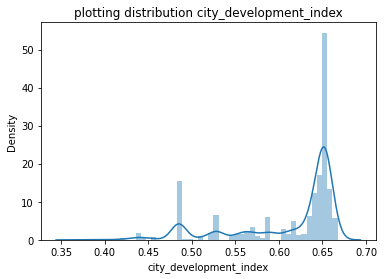

experience


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


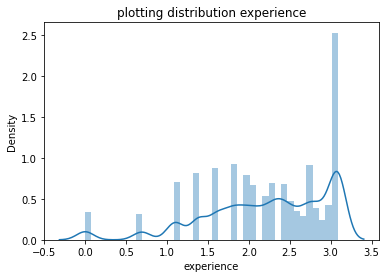

training_hours


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


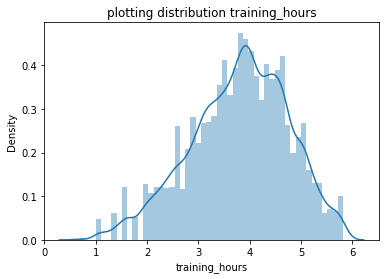

In [64]:
for col in num_val.columns[0:-1]:
    print(col)
    sns.distplot(np.log1p(num_val[col]))
    num_val[col]=np.sqrt(num_val[col])
    plt.title('plotting distribution ' + col)
    plt.xlabel(col)
    plt.show()

In [65]:
num_val.columns

Index(['city_development_index', 'experience', 'training_hours', 'target'], dtype='object')

In [66]:
data_1=pd.concat([num_val,cat_val],1)
data_1.head()

,city_development_index,experience,training_hours,target,city,gender,relevent_experience,enrolled_university,education_level,major_discipline,company_size,company_type,last_new_job
0,0.830060,1.732051,10.295630,0,41,1,0,2,0,5,1,5,0
1,0.960729,3.741657,8.306624,0,112,1,0,2,0,5,7,1,0
2,0.953939,2.449490,2.000000,0,48,1,0,2,0,5,4,4,1
3,0.816088,3.741657,5.099020,0,93,1,0,2,0,5,4,5,0
4,0.941807,2.828427,9.380832,1,2,1,1,2,2,5,4,5,1


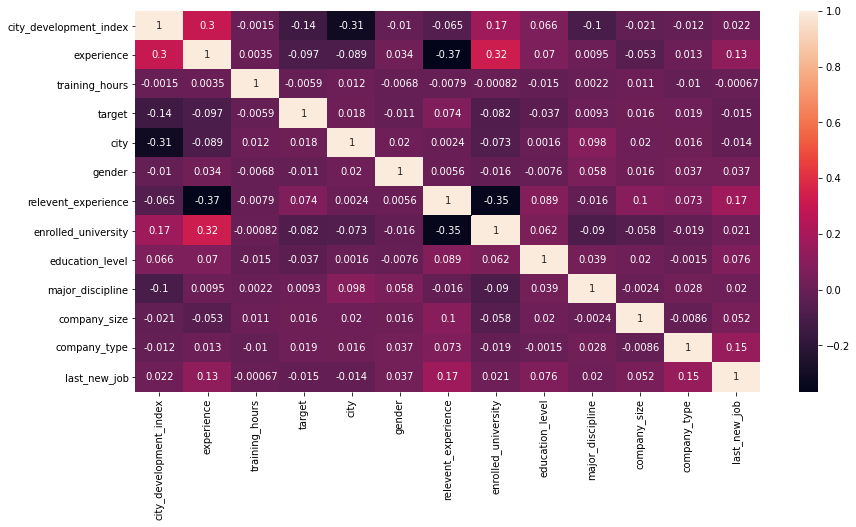

In [67]:
fig,ax = plt.subplots(figsize = (14,7))
sns.heatmap(data_1.corr(),annot=True)

In [68]:
X = data_1.drop(['target'],1)
y = data_1['target']

In [69]:
columns = X.columns
scaler =  MinMaxScaler(feature_range=(0, 1))
X = scaler.fit_transform(X)

In [70]:
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [71]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)

In [72]:
lsvc = LinearSVC(C = 0.01, penalty="l1", dual=False, random_state=42).fit(X_train, y_train)
model_2 = SelectFromModel(lsvc, prefit=True)
new_train_features = model_2.transform(X_train)
new_test_features = model_2.transform(X_test)

print(new_train_features.shape,new_test_features.shape )

# model building on reduced set of features
classifier_2 = SVC()
clf_2 = classifier_2.fit(new_train_features, y_train)
y_pred_new = clf_2.predict(new_test_features)
model2_score =accuracy_score(y_test, y_pred_new)
precision, recall, f_score, _ = error_metric(y_test, y_pred_new, average='weighted')
print(model2_score)
print(precision, recall, f_score)


(25494, 11) (6374, 11)
0.6272356448070285
0.6287458647587232 0.6272356448070285 0.6254462641101004


In [66]:
est = SVC()
params = {'kernel' : ['linear','poly'],
         'C' : [100,20,1,0.1]}

def rscv(est, params,nbr_iter, x,y):
    rv = RandomizedSearchCV(est, param_distributions = params, n_jobs = -1, n_iter = nbr_iter, cv = 4)
    rv.fit(x,y)
    ht_params = rv.best_params_
    ht_score = rv.best_score_
    
    return ht_params, ht_score

In [67]:
cv_ht_params, cv_ht_score = rscv(est, params, 10, X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:281: UserWarning: The total space of parameters 8 is smaller than n_iter=10. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)


In [69]:
print(cv_ht_params)
print(cv_ht_score)

{'kernel': 'poly', 'C': 20}
0.6345019381607307


In [73]:
logreg = LogisticRegression()
logreg.fit(X_train,y_train)
y_pred = logreg.predict(X_test)

print('Accuracy is {}'.format(accuracy_score(y_test,y_pred)))
print('test roc-auc: {}'.format(roc_auc_score(y_test, y_pred)))
print('F1-score is {}'.format(f1_score(y_test,y_pred)))
print('precision_score is {}'.format(precision_score(y_test,y_pred)))
print('Confusion Matrix is')
print()
print((confusion_matrix(y_test,y_pred)))

Accuracy is 0.6077816128020082
test roc-auc: 0.6069625154780279
F1-score is 0.5755517826825127
precision_score is 0.6183874498358264
Confusion Matrix is

[[2179 1046]
 [1454 1695]]


In [74]:
model_10 = GradientBoostingClassifier(n_estimators=10, max_depth=6, random_state=0).fit(X_train, y_train)
model_50 = GradientBoostingClassifier(n_estimators=50, max_depth=6, random_state=0).fit(X_train, y_train)
model_100 = GradientBoostingClassifier(n_estimators=100, max_depth=6, random_state=0).fit(X_train, y_train)
y_pred_10 = model_10.predict(X_test)
y_pred_50 = model_50.predict(X_test)
y_pred_100 = model_100.predict(X_test)
print('Accuracy for model_10 is {}'.format(accuracy_score(y_test,y_pred_10)))
print('test roc-auc: {}'.format(roc_auc_score(y_test, y_pred_10)))
print('F1-score is {}'.format(f1_score(y_test,y_pred_10)))
print('Confusion Matrix is')
print()
print((confusion_matrix(y_test,y_pred_10)))
print("=======================================================================")

print('Accuracy model_50 is {}'.format(accuracy_score(y_test,y_pred_50)))
print('test roc-auc: {}'.format(roc_auc_score(y_test, y_pred_50)))
print('F1-score is {}'.format(f1_score(y_test,y_pred_50)))
print('Confusion Matrix is')
print()
print((confusion_matrix(y_test,y_pred_50)))
print("======================================================================")

print('Accuracy model_100 is {}'.format(accuracy_score(y_test,y_pred_100)))
print('test roc-auc: {}'.format(roc_auc_score(y_test, y_pred_100)))
print('F1-score is {}'.format(f1_score(y_test,y_pred_100)))
print('Confusion Matrix is')
print()
print((confusion_matrix(y_test,y_pred_100)))

Accuracy for model_10 is 0.7572952620018827
test roc-auc: 0.7567649629142758
F1-score is 0.7435769932040444
Confusion Matrix is

[[2584  641]
 [ 906 2243]]
Accuracy model_50 is 0.8647631000941324
test roc-auc: 0.8639244155275084
F1-score is 0.852901023890785
Confusion Matrix is

[[3013  212]
 [ 650 2499]]
Accuracy model_100 is 0.8958267963602133
test roc-auc: 0.8948952417526421
F1-score is 0.8856749311294766
Confusion Matrix is

[[3138   87]
 [ 577 2572]]


In [75]:
xgb_clf = XGBClassifier(base_estimator=logreg,random_state=0,learning_rate=0.38)
xgb_clf.fit(X_train, y_train)
xgb_predict= xgb_clf.predict(X_test)
print('Accuracy is {}'.format(accuracy_score(y_test,xgb_predict)))
print('test roc-auc: {}'.format(roc_auc_score(y_test, xgb_predict)))
print('F1-score is {}'.format(f1_score(y_test,xgb_predict)))
print('Confusion Matrix is')
print()
print((confusion_matrix(y_test,xgb_predict)))

Accuracy is 0.9005334170065893
test roc-auc: 0.8995426627377708
F1-score is 0.890235457063712
Confusion Matrix is

[[3169   56]
 [ 578 2571]]


In [76]:
rf_model = RandomForestClassifier(random_state=33)
param_grid = dict(n_estimators=range(10,100,10),max_depth=range(3,10),min_samples_split=range(8,10,15),min_samples_leaf=range(10,15),max_leaf_nodes=range(8,10))
grid_rf = RandomizedSearchCV(rf_model,param_grid,scoring='accuracy',n_jobs=-1,cv=5,random_state=33)
grid_rf.fit(X_train,y_train)
dt_pred = grid_rf.best_estimator_.predict(X_test)
print('accuracy_score:',accuracy_score(y_test, dt_pred))
print('roc_auc_score:',roc_auc_score(y_test, dt_pred))
print("f1_score: ",f1_score(y_test,dt_pred))

accuracy_score: 0.6859115155318481
roc_auc_score: 0.6853991300302053
f1_score:  0.6689814814814815


In [77]:
xgb_model = XGBClassifier(objective='binary:logistic',n_jobs=-1)
param_grid = {'max_depth':range(5,15,3),'learning_rate':np.arange(0.01,0.3,0.01),'n_estimators':range(100,200,10),'min_child_weight':range(1,15,2),'reg_lambda':range(0,5,1),'subsample':np.arange(60,110,10)/100,'colsample_bylevel':np.arange(60,110,10)/100,'colsample_bytree':np.arange(60,110,10)/100,'colsample_bynode':np.arange(60,110,10)/100,'scale_pos_weight':np.arange(1,15,1)}
grid_xgb = RandomizedSearchCV(xgb_model,param_grid,scoring='accuracy',cv=5,random_state=33)
grid_xgb.fit(X_train,y_train)

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1, gamma=0,
                                           learning_rate=0.1, max_delta_step=0,
                                           max_depth=3, min_child_weight=1,
                                           missing=None, n_estimators=100,
                                           n_jobs=-1, nthread=None,
                                           objective='binary:logistic',
                                           random_state=0, reg_alpha=0,
                                           reg_lambda=1, s...
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29]),
                                        'max_depth': range(5, 15, 3),
                                        'min_child_weigh

In [78]:
dt_pred = grid_xgb.best_estimator_.predict(X_test)
print('accuracy_score:',accuracy_score(y_test, dt_pred))
print('roc_auc_score:',roc_auc_score(y_test, dt_pred))
print("f1_score: ",f1_score(y_test,dt_pred))

accuracy_score: 0.8824913711954816
roc_auc_score: 0.882450341070501
f1_score:  0.8808273667462212


##Let's work on test data now!

In [79]:
df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
0,16548,city_33,0.448,NaN,No relevent experience,Full time course,Graduate,STEM,<1,1000-4999,Public Sector,NaN,15
1,12036,city_28,0.939,Male,No relevent experience,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,1,94
2,11061,city_103,0.920,Male,No relevent experience,Full time course,Graduate,STEM,3,NaN,NaN,1,17
3,5032,city_104,0.924,Male,No relevent experience,no_enrollment,Phd,STEM,>20,50-99,Pvt Ltd,2,76
4,17599,city_77,0.830,Male,Has relevent experience,no_enrollment,Graduate,STEM,6,<10,Pvt Ltd,2,65


In [80]:
df.gender=data.gender.fillna('Other')

In [81]:
df.enrolled_university=df.enrolled_university.fillna("no_enrollment")

In [82]:
df.education_level=df.education_level.fillna("Graduate")

In [83]:
df[df.education_level=='High School']['major_discipline'].replace(np.NaN,'Other',inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4582: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


In [84]:
df[df.education_level=='Primary School']['major_discipline'].replace(np.NaN,'Other',inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4582: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


In [85]:
df.major_discipline=df.major_discipline.fillna("STEM")

In [86]:
df[df.relevent_experience=="No relevent experience"]['experience']=df[df.relevent_experience=="No relevent experience"]['experience'].replace(np.NaN,'0')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [87]:
df[df.relevent_experience=="Has relevent experience"]['experience']=df[df.relevent_experience=="Has relevent experience"]['experience'].replace(np.NaN,'1')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [88]:
df.experience= df.experience.replace(np.NaN,0)
df.experience.replace('>20',21,inplace=True)
df.experience.replace('<1',0,inplace=True)
df.experience=df.experience.astype(int)
df.company_type=df.company_type.fillna('Pvt Ltd')
df.company_size=df.company_size.fillna('50-99')
df.last_new_job=df.last_new_job.fillna('1')
num_val_test =df.select_dtypes(exclude =object)
cat_val_test =df.select_dtypes(include =object)

In [89]:
new_id=df.enrollee_id
new_id['id']=num_val_test.enrollee_id
num_val_test.drop('enrollee_id',1,inplace=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [90]:
label_en_test=['city','education_level','major_discipline','company_size','company_type','last_new_job']
labelencoder_X_1 = LabelEncoder()
for var in cat_val_test.columns:
     cat_val_test[var] = labelencoder_X_1.fit_transform(cat_val_test[var])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [91]:
cat_val_test.head()

,city,gender,relevent_experience,enrolled_university,education_level,major_discipline,company_size,company_type,last_new_job
0,73,1,1,0,0,5,2,4,0
1,70,1,1,2,0,5,4,5,0
2,5,1,1,0,0,5,4,5,0
3,6,1,1,2,3,5,4,5,1
4,105,1,0,2,0,5,7,5,1


In [92]:
for col in num_val_test.columns:
    num_val_test[col]=np.sqrt(num_val_test[col])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [93]:
data_test=pd.concat([num_val_test,cat_val_test],1)

In [94]:
data_test.columns

Index(['city_development_index', 'experience', 'training_hours', 'city',
       'gender', 'relevent_experience', 'enrolled_university',
       'education_level', 'major_discipline', 'company_size', 'company_type',
       'last_new_job'],
      dtype='object')

In [95]:
columns = data_test.columns
scaler =  MinMaxScaler(feature_range=(0, 1))
data_test = scaler.fit_transform(data_test)

In [96]:
xgb_predict_test= xgb_clf.predict(data_test)